I. Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?

In [ ]:
import numpy as np

In [ ]:
def random_adj_matrix(num_verts, num_edges):
    '''
    Generates a random adjacency matrix for a simple undirected unweighted graph
    
    Parameters:
    ----------
    num_verts - int, number of vertices
    num_edges - int, number of edges

    Output:
    result - 2D array
    '''
    num_sells_triangle = int((num_verts - 1) * num_verts / 2) # counting the number of sells that will be symmetric
    edge_indices = np.random.choice(range(num_sells_triangle), num_edges, replace=False) # picking random connections (pairs)
    triangle_list = np.zeros(num_sells_triangle) # initializing the list
    triangle_list[edge_indices] = 1 # marking the connections
    result = np.zeros((num_verts, num_verts)) # initializing the result matrix
    triangle_indices = np.triu_indices(num_verts, k=1) # all the indices of the upper triangle (the diagonal is not included)
    result[triangle_indices] = triangle_list # pasting the random ones into the result matrix
    result = result + np.rot90(np.fliplr(result)) # pasting symmetric ones

    return result

In [ ]:
def adj_matrix_to_list(matrix):
  '''
  Transfer adjecency matrix into adjecency list
  
  Paramers:
  matrix - 2D array 
  
  Output:
  result - 1D array
  '''
  result = [set(j for j, cell in enumerate(row) if cell == 1) for row in matrix]
  
  return result

In [ ]:
m = random_adj_matrix(100, 200)
adj_list  = adj_matrix_to_list(m)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def edges_for_graph(matrix):
  '''
  Getting the edges in format suitable for networkx library
  '''
  result = [[(i, j) for j in range(len(matrix)) if matrix[i][j] == 1] for i in range(matrix.shape[0])]
  return result

In [ ]:
edges = edges_for_graph(m)

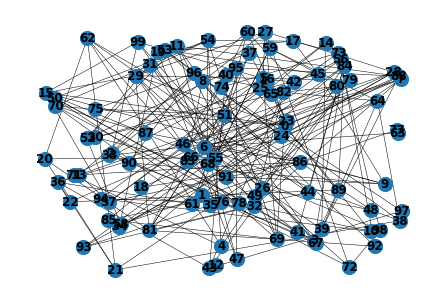

In [ ]:
# Visualizing the graph
G=nx.Graph()
G.add_nodes_from(list(range(100)))
for ed in edges:
  G.add_edges_from(ed)

options = {
    'node_size': 200,
    'width': 0.5,
    'with_labels': True,
    'font_weight': 'bold'
} 
nx.draw_random(G, **options)
#nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# Printing several rows of the adjecency matrix and the adjecency list
print('Adjecency matrix:\n')
print(m[..., :10, :10])
print('\n')
print('Adjecency list:\n')
print(adj_list[:10])

Adjecency matrix:

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Adjecency list:

[{80, 66, 21, 55}, {96, 33, 39, 17, 86, 56, 28}, {75, 20}, {8, 88, 27, 38}, {73, 74, 70, 94}, {48, 57, 47}, {96, 71, 52, 57, 94}, {34, 99, 10, 43, 83, 56}, {64, 3, 43, 46, 48, 94}, {10, 91, 77, 31}]


II. Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.

In [ ]:
def dfs(graph, start, visited=None):
    '''
    This function uses Depth-first search algorithm to find connected components of a given grapgh.
    
    Parameters:
    ----------
    graph: list of sets, graph's adjecency list
    start: int, a number of a vertice to start from
    visited: set, numbers of vertices visited before (every vertice should be visited not more than once)

    Output:
    visited - a set of numbers of visited vertices
    '''
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    if len(graph[start] - visited) == 0:
        print('End of one connected part (subgraph)')
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited
 
dfs(adj_list, 0)

0
80
97
50
24
11
81
33
1
96
66
72
48
5
57
18
25
43
7
34
86
70
64
8
94
4
73
47
77
9
10
49
56
99
68
83
41
13
88
40
End of one connected part (subgraph)
89
37
58
62
End of one connected part (subgraph)
62
End of one connected part (subgraph)
67
61
59
35
17
90
45
End of one connected part (subgraph)
78
19
75
2
20
82
65
92
End of one connected part (subgraph)
95
42
End of one connected part (subgraph)
27
3
38
60
End of one connected part (subgraph)
21
46
14
51
End of one connected part (subgraph)
31
55
End of one connected part (subgraph)
30
End of one connected part (subgraph)
69
54
52
44
36
26
32
63
End of one connected part (subgraph)
84
End of one connected part (subgraph)
23
End of one connected part (subgraph)
6
71
85
End of one connected part (subgraph)
79
End of one connected part (subgraph)
39
End of one connected part (subgraph)
74
End of one connected part (subgraph)
51
End of one connected part (subgraph)
23
End of one connected part (subgraph)
28
End of one connected part (subg

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99}

In [ ]:
import collections
def bfs(graph, start, end):
  '''
  Shows the shortest path between two vertices

  Params:
  ------
  graph: list, graph's adjecency list
  start: int, a number of a vertice to start from
  end: int, a number of an ending vertice
  '''
  if start == end:
    print('The start an the end is the same')
  visited = set()
  queue = [[start]]
  result = []
  iter = 0

  while queue:
      result = queue.pop(0)
      next = result[-1]
      if not next in visited:
         for neighbour in graph[next]:
            new_result = list(result)
            new_result.append(neighbour)
            queue.append(new_result)
            if neighbour == end:
              return new_result
         visited.add(next)
      iter += 1
      if iter > 10000:
        return new_result
  
  print('There is no path between {} and {}'.format(start, end))


bfs(adj_list, np.random.randint(0, 100), np.random.randint(0, 100))


There is no path between 77 and 76
